# Starbucks Nutrition Facts Analysis

In [2]:
# Library
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For mathematical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For statistical data visualization
import plotly.express as px  # For interactive visualizations
import os  # For operating system interaction

cwd = os.getcwd()  # Gets the current working directory
print('Current Working Directory is:', cwd)  # Prints current working directory


Current Working Directory is: d:\Spring 2023\Python


In [6]:
data = pd.read_csv('starbucks.csv', index_col='Unnamed: 0')  # Reads csv file
data.head(5)  # Retrieve and display the first 5 rows of the DataFrame


,item,calories,fat,carb,fiber,protein,type
1,8-Grain Roll,350,8.0,67,5,10,bakery
2,Apple Bran Muffin,350,9.0,64,7,6,bakery
3,Apple Fritter,420,20.0,59,0,5,bakery
4,Banana Nut Loaf,490,19.0,75,4,7,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [7]:
data.describe()  # Compute summary statistics of the DataFrame


,calories,fat,carb,fiber,protein
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,338.831169,13.766234,44.870130,2.220779,9.480519
std,105.368701,7.095488,16.551634,2.112764,8.079556
min,80.000000,0.000000,16.000000,0.000000,0.000000
25%,300.000000,9.000000,31.000000,0.000000,5.000000
50%,350.000000,13.000000,45.000000,2.000000,7.000000
75%,420.000000,18.000000,59.000000,4.000000,15.000000
max,500.000000,28.000000,80.000000,7.000000,34.000000


In [8]:
data.info()  # Display information about the DataFrame


<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 1 to 77
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item      77 non-null     object 
 1   calories  77 non-null     int64  
 2   fat       77 non-null     float64
 3   carb      77 non-null     int64  
 4   fiber     77 non-null     int64  
 5   protein   77 non-null     int64  
 6   type      77 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.8+ KB


In [9]:
data.columns  # Retrieve the column labels of the DataFrame


Index(['item', 'calories', 'fat', 'carb', 'fiber', 'protein', 'type'], dtype='object')

In [10]:
# Compute summary statistics and transpose the resulting DataFrame
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
calories,77.0,338.831169,105.368701,80.0,300.0,350.0,420.0,500.0
fat,77.0,13.766234,7.095488,0.0,9.0,13.0,18.0,28.0
carb,77.0,44.870130,16.551634,16.0,31.0,45.0,59.0,80.0
fiber,77.0,2.220779,2.112764,0.0,0.0,2.0,4.0,7.0
protein,77.0,9.480519,8.079556,0.0,5.0,7.0,15.0,34.0


In [11]:
data['item'].nunique()  # Count the number of unique values in the 'item' column


77

In [12]:
data.isnull().sum()  # Calculate the number of missing values in each column


item        0
calories    0
fat         0
carb        0
fiber       0
protein     0
type        0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

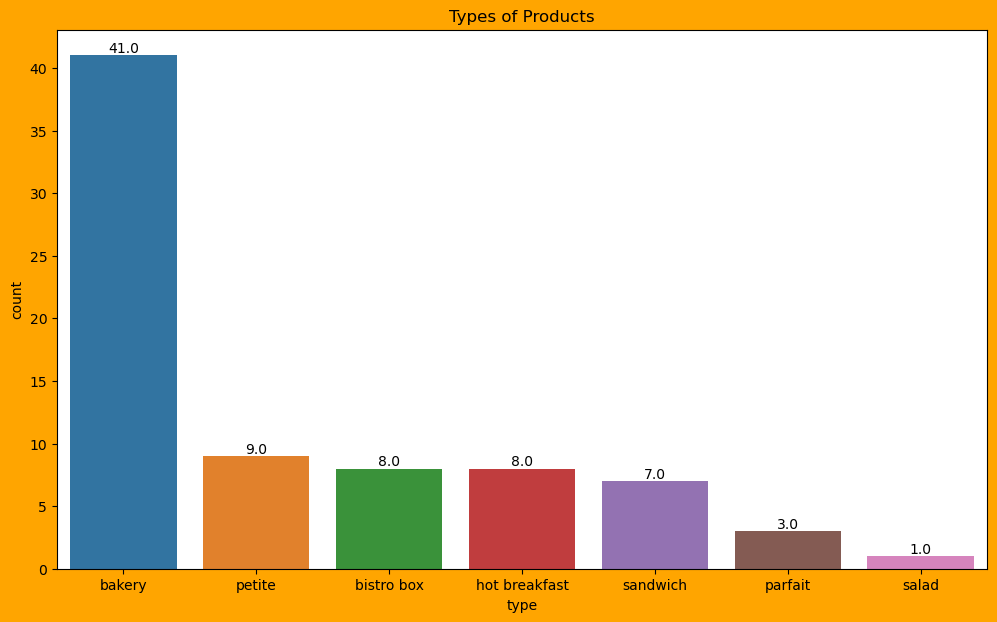

In [13]:
# Create a new figure with specified facecolor and size
plt.figure(facecolor='orange', figsize=(12, 7))
# Calculate the count of each type and sort in descending order
type_counts = data['type'].value_counts().sort_values(ascending=False)
# Create a countplot using the 'type' column from the 'data' DataFrame
ax = sns.countplot(data=data, x='type', order=type_counts.index)
# Add value labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2,
                p.get_height()), ha='center', va='bottom')  # Shows value for each graph
plt.title('Types of Products')  # Set the title of the plot
plt.show


Text(0.5, 1.0, 'Calories In Item Type')

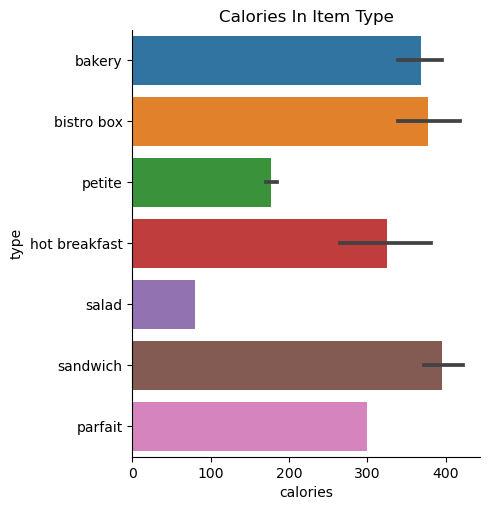

In [23]:
sns.catplot(kind='bar', data=data, y='type', x='calories')
plt.title("Calories In Item Type")


Text(0.5, 1.0, 'Fat In Item Type')

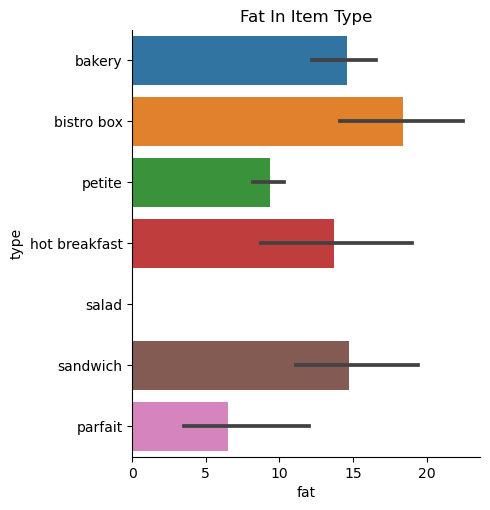

In [24]:
sns.catplot(data=data, y='type', x='fat', kind='bar')
plt.title("Fat In Item Type")


Text(0.5, 1.0, 'Carbs In Item Type')

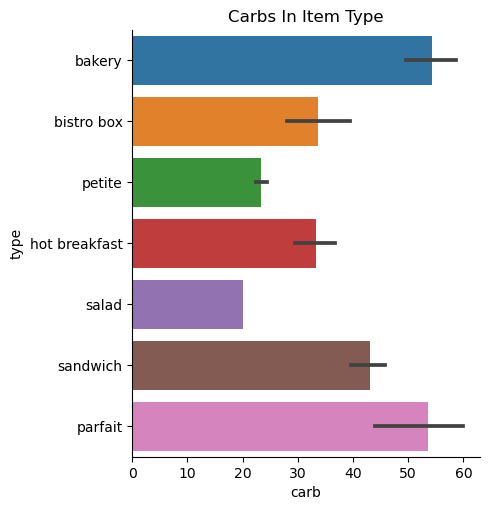

In [25]:
sns.catplot(data=data, y='type', x='carb', kind='bar')
plt.title("Carbs In Item Type")


Text(0.5, 1.0, 'Fibers In Item Type')

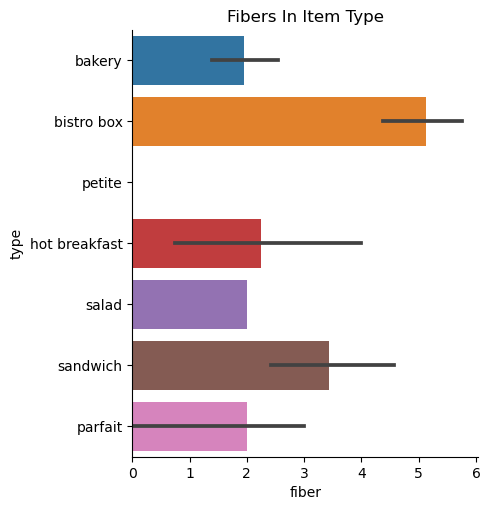

In [51]:
sns.catplot(data=data, y='type', x='fiber', kind='bar')
plt.title('Fibers In Item Type')


Text(0.5, 1.0, 'Proteins In Item Type')

<Figure size 1900x400 with 0 Axes>

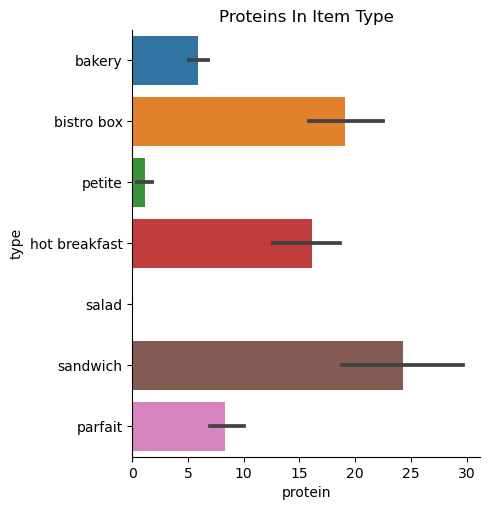

In [26]:
plt.figure(figsize=(19, 4))
sns.catplot(data=data, y='type', x='protein', kind='bar')
plt.title("Proteins In Item Type")


Text(0.5, 1.0, 'Top 10 Products of Calories')

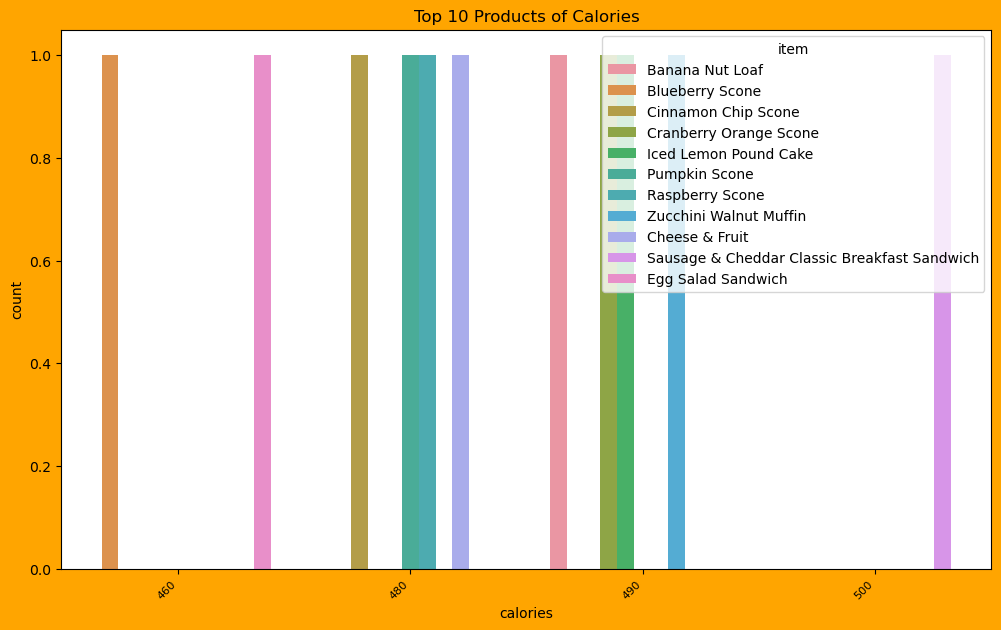

In [63]:
# Create a new DataFrame 'cal' with rows where 'calories' is greater than or equal to 460
# Filter the data to include only rows where calories are greater than or equal to 460
cal = data[(data['calories'] >= 460)]
# Create a new figure with specified facecolor and size
plt.figure(facecolor='orange', figsize=(12, 7))
# Create a countplot using the filtered 'cal' DataFrame, with 'calories' on the x-axis, and different items represented by different colors
ax = sns.countplot(data=cal, x='calories', hue='item',
                   order=ordered_calories.index)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title("Top 10 Products of Calories")


In [64]:
# Count the number of items in the 'item' column of the DataFrame 'cal'
hci = cal['item'].count()
print('In the store there are {} Products that have the most calories.'.format(hci))


In the store there are 11 Products that have the most calories.


In [65]:
# Convert the 'item' column of the DataFrame 'cal' to a Python list
itemlist = cal['item'].tolist()
print('Top 10 calories item namelist:\n')
for item in itemlist:  # Iterate over each item in the 'itemlist'
    print(item)  # Prints each item


Top 10 calories item namelist:

Banana Nut Loaf
Blueberry Scone
Cinnamon Chip Scone
Cranberry Orange Scone
Iced Lemon Pound Cake
Pumpkin Scone 
Raspberry Scone
Zucchini Walnut Muffin 
Cheese & Fruit
Sausage & Cheddar Classic Breakfast Sandwich
Egg Salad Sandwich 


In [66]:
# Create a new DataFrame 'cal' with rows where 'protein' is greater than or equal to 19
cal = data[data['protein'] >= 19]
# Count the number of items in the 'item' column of the DataFrame 'cal'
hpi = cal['item'].count()
print("In the store there are {} products that have the most protein.".format(hci))


In the store there are 11 products that have the most protein.


In [67]:
# Convert the 'item' column of the DataFrame 'cal' to a Python list
itemlist = cal['item'].tolist()
print("Top 10 proteins item namelist: \n")
for item in itemlist:  # Iterate over each item in the 'itemlist'
    print(item)  # Prints each item


Top 10 proteins item namelist: 

Chipotle Chicken Wraps
Salumi & Cheese
Tuna Salad
Ham & Cheddar Artisan Breakfast Sandwich
Sausage & Cheddar Classic Breakfast Sandwich
Spinach & Feta Breakfast Wrap
Chicken Santa Fe Panini
Egg Salad Sandwich 
Ham & Swiss Panini
Tarragon Chicken Salad Sandwich
Turkey & Swiss Sandwich


Text(0.5, 1.0, 'Fat vs. Calories')

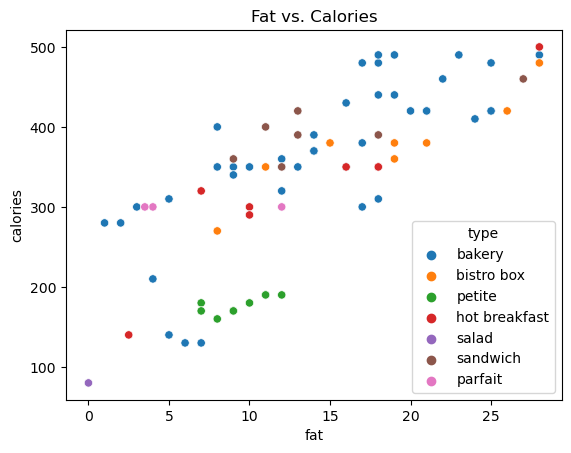

In [69]:
sns.scatterplot(x='fat', y='calories', data=data, hue='type')
plt.title("Fat vs. Calories")


Text(0.5, 1.0, 'Fat vs. Protein')

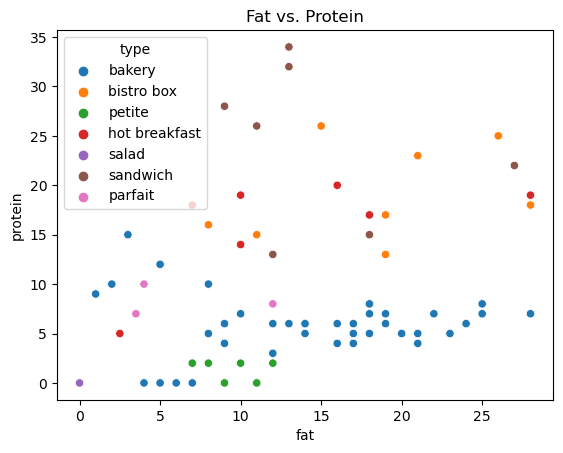

In [70]:
sns.scatterplot(x='fat', y='protein', data=data, hue='type')
plt.title('Fat vs. Protein')


Text(0.5, 1.0, 'Carbs vs. Calories')

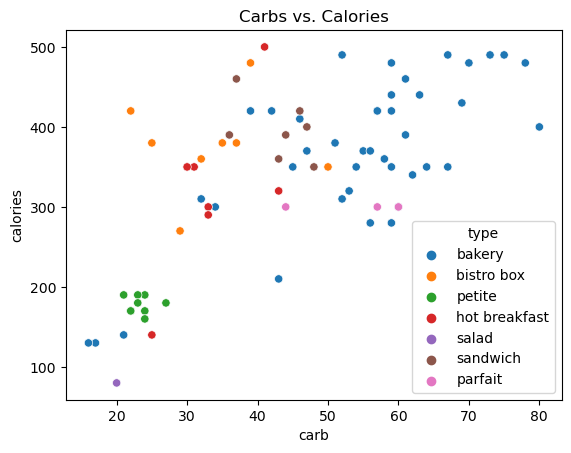

In [71]:
sns.scatterplot(x='carb', y='calories', data=data, hue='type')
plt.title("Carbs vs. Calories")
